## Create Graph Plots of the Vector Images in Tempest

In [10]:
from itertools import groupby
from operator import itemgetter
from matplotlib import pyplot as plt
import os

plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150

colors = {
    "TURQOI":"CYAN",
    "PDIWHI":"WHITE",
    "PDIRED":"RED",
    "PDIYEL":"YELLOW",
    "":"WHITE",
}

def vctr(color,x,y,i=""):
    x,y = int(x,16),int(y,16)
    if i == "0":
        return (x,y,"BLACK")
    return (x,y,colors.get(color,color))

def parse_vector_commands(vector_data,default_color="red"):
    # Read in the vector commands from the Tempest source code
    # and translate them into a series of vectors, i.e. a  list of 
    # tuples of the form (x,y,color).
    # This list can then be transformed into a series of x,y co-ordinates
    # for plotting on a graph.
    color = ""
    vecs = []
    old_x,old_y = 0,0
    CALBRITE = "BLACK"
    for l in vector_data.splitlines():
        if not l.strip():
            continue
        tokens = l.strip().split()
        cmd, parms = tokens[0],tokens[1:]
        if cmd in ["ICVEC","ICALVE"]:
            vecs+=[(0,0,"BLACK")]
            old_x,old_y=0,0
        elif cmd == "CNTR":
            vecs+=[(0,0,"BLACK")]
        elif cmd == "CSTAT":
            color = parms[0]
        elif cmd == "VCTR":
            parms = parms[0].split(',')
            vecs+=[vctr(color,*parms)]
        elif cmd in [".BRITE=VARBRT",".BRITE =VARBRT"]:
            CALBRITE=default_color
        elif cmd in [".BRITE=0",".BRITE =0"]:
            CALBRITE="BLACK"
    return vecs

def vectors_to_coords(vectors):
    # Turns a series of vectors into a series of x,y co-ordinates
    # or vertices.
    xs,ys,cs=[],[],[]
    px,py,pc=0,0,None
    for x,y,c in vectors:
        # If we're changing color, add a vertex with the
        # new color at the old position.
        if pc and c != pc:
            xs+=[px]
            ys+=[py]
            cs+=[c]
        # Calculate the position of the new vertex
        px+=x
        py+=y
        xs+=[px]
        ys+=[py]
        cs+=[c]
        pc=c
    return list(zip(xs,ys,cs))



In [13]:
def plot_vertices(verts,file_name,points="",linewidth=3.0):
    # Plot a series of vertices onto a graph. In other words,
    # create an image from them.
    _, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box') 
    last_x,last_y=[],[]
    for k,g in groupby(verts, key=itemgetter(2)):
        l = list(g)
        xs,ys,_ =zip(*l)
        # Don't paint the vectors marked as black, 
        # we're just moving the beam.
        alpha = 0 if k == "BLACK" else 1
        ax.plot(xs,ys,points+'-',color=k,alpha=alpha,linewidth=linewidth)
    plt.savefig(f"literals/{file_name}.png", bbox_inches='tight')

def plot_vertices_imgonly(verts,file_name,points="",linewidth=3.0):
    # Plot a series of vertices onto a graph. In other words,
    # create an image from them.
    _, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box') 
    last_x,last_y=[],[]
    for k,g in groupby(verts, key=itemgetter(2)):
        l = list(g)
        xs,ys,_ = zip(*l)
        # Don't paint the vectors marked as black, 
        # we're just moving the beam.
        alpha = 0 if k == "BLACK" else 1
        ax.plot(xs,ys,points+'-',color=k,alpha=alpha,linewidth=linewidth)
    plt.axis('off')
    plt.savefig(f"literals/{file_name}.png", bbox_inches='tight')


## Images from ANVGAN.MAC

This file contains the vectors for all alphanumerics. The values given are decimal rather than hexadecimal.

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_252689/2722340110.py:3: SyntaxWarning: invalid escape sequence '\.'
  letters = [tuple(x.split(':')) for x in re.split('CHAR\.',anvgan)[1:27]]
/tmp/ipykernel_252689/2652675367.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


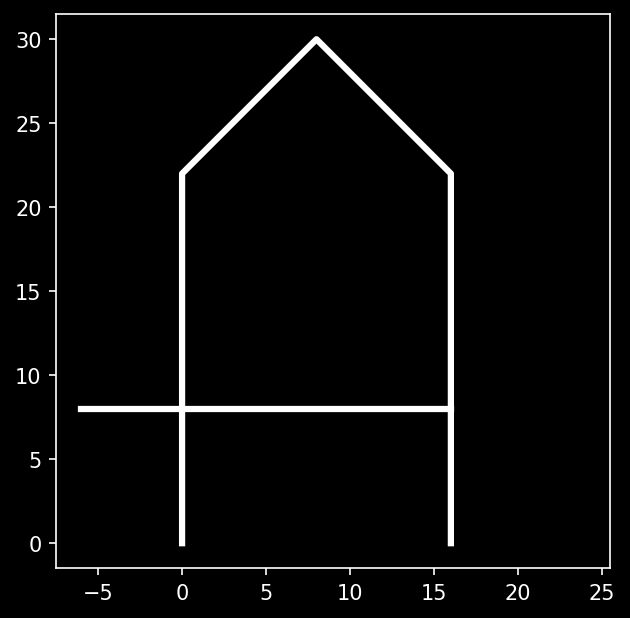

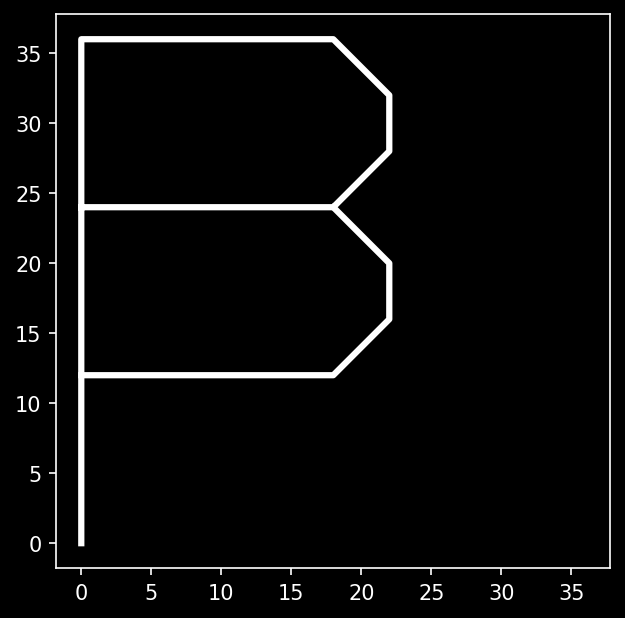

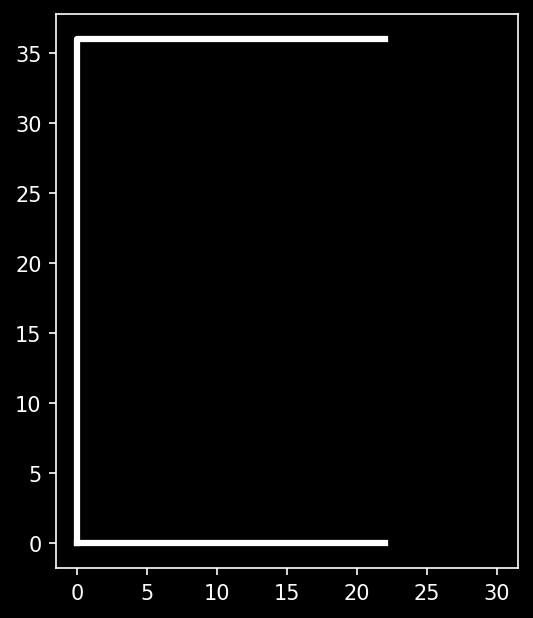

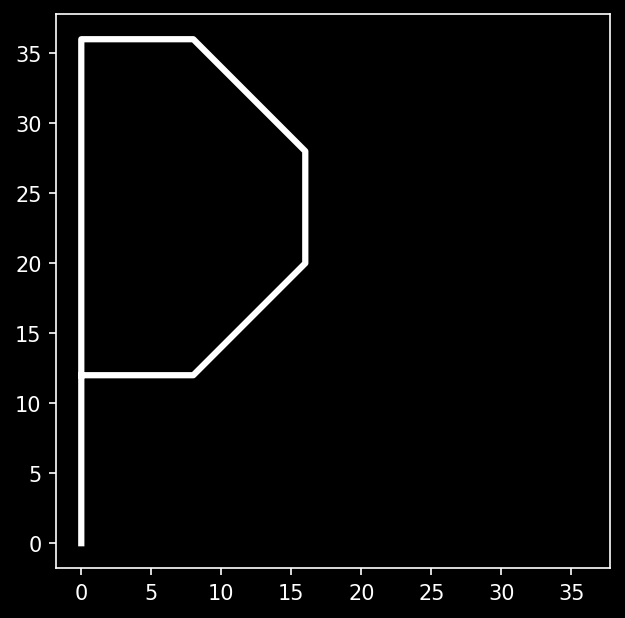

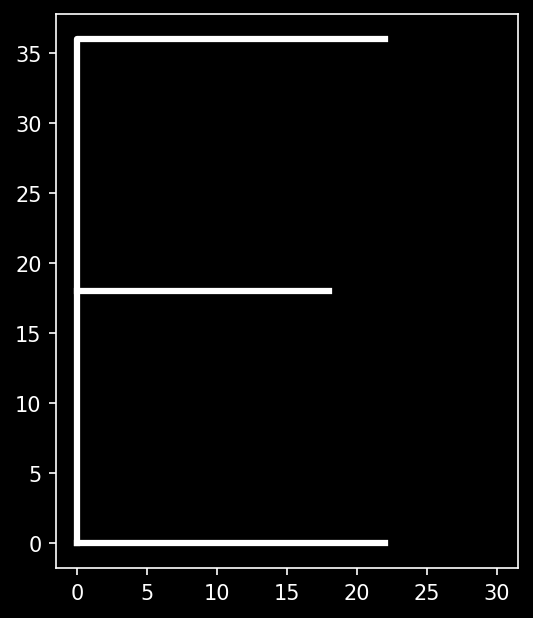

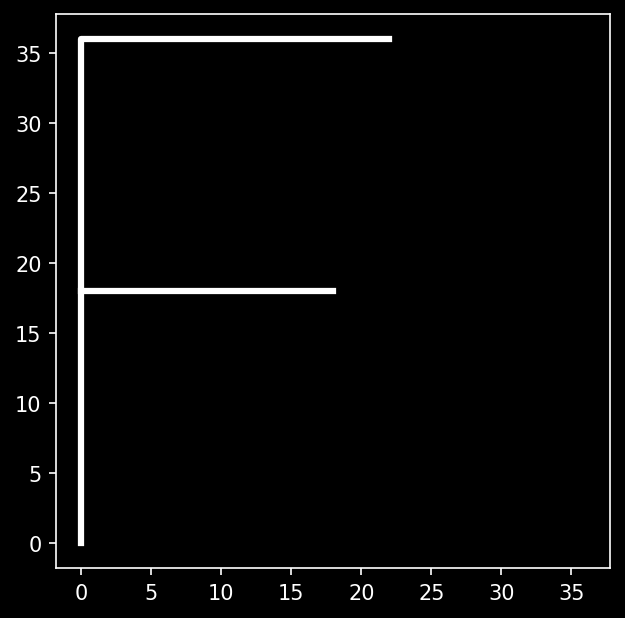

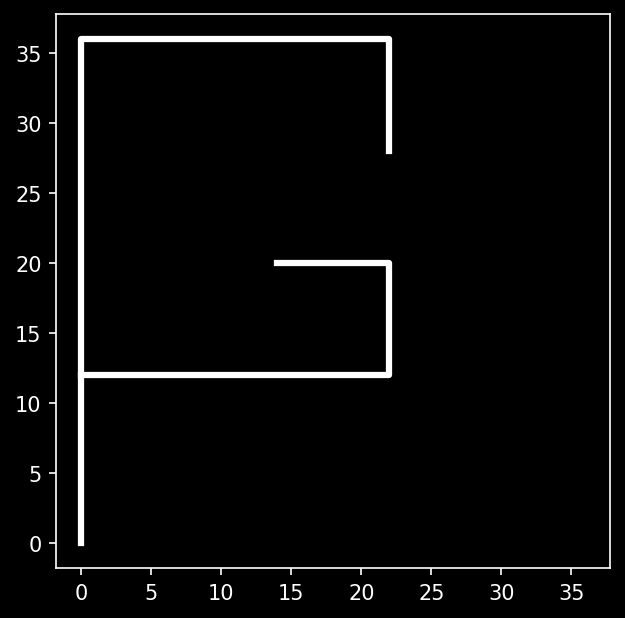

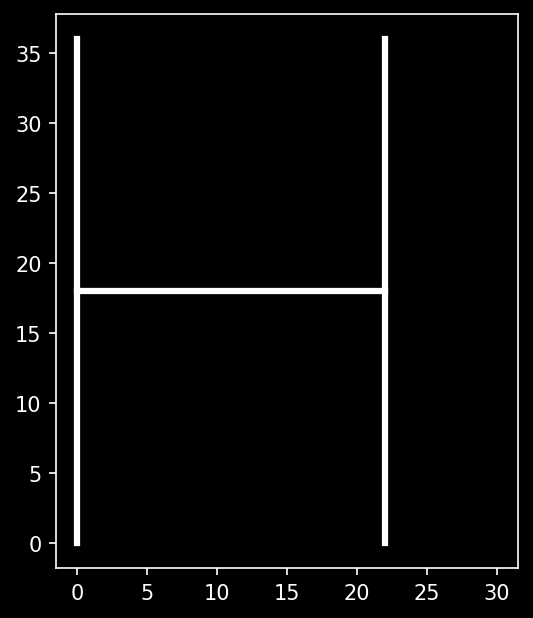

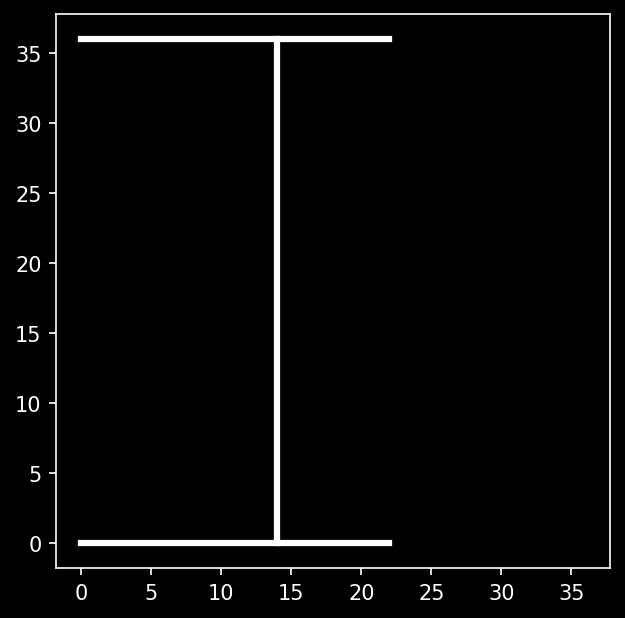

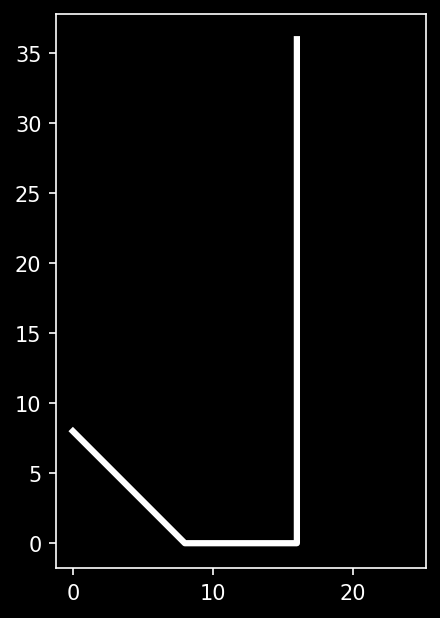

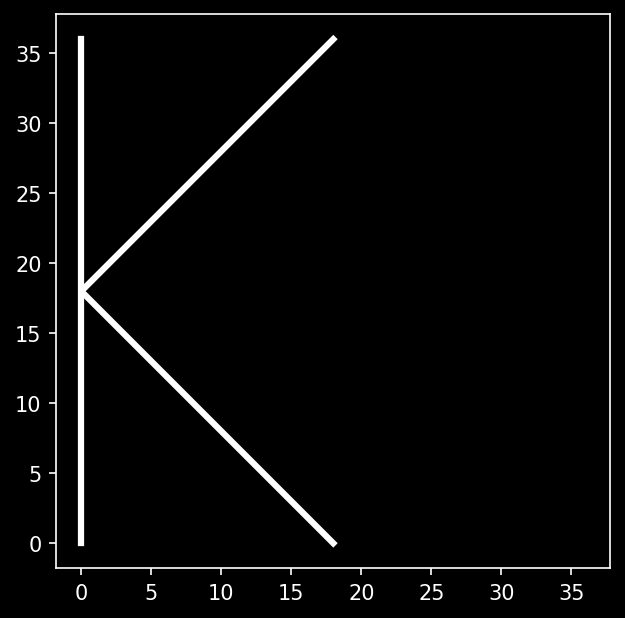

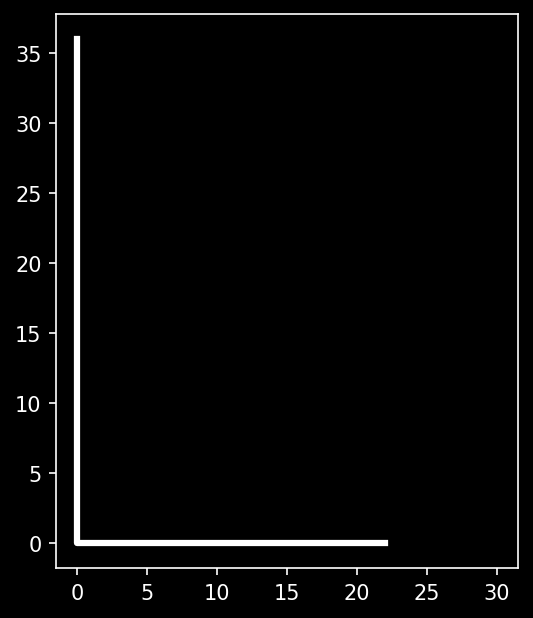

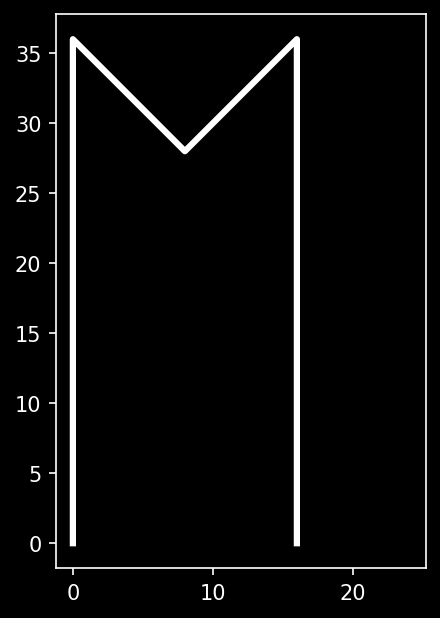

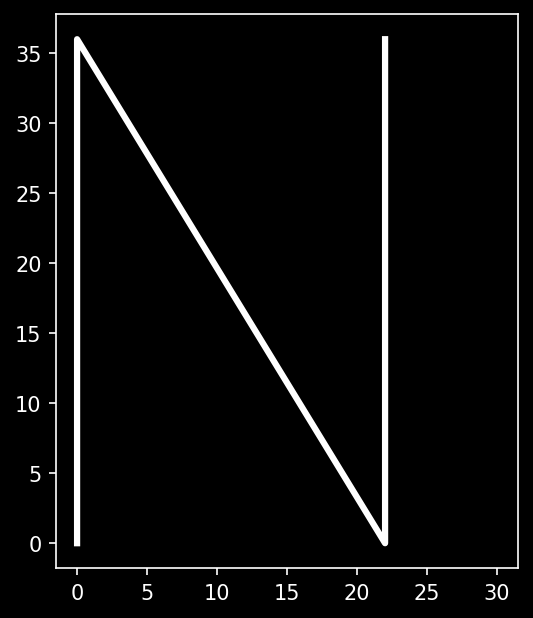

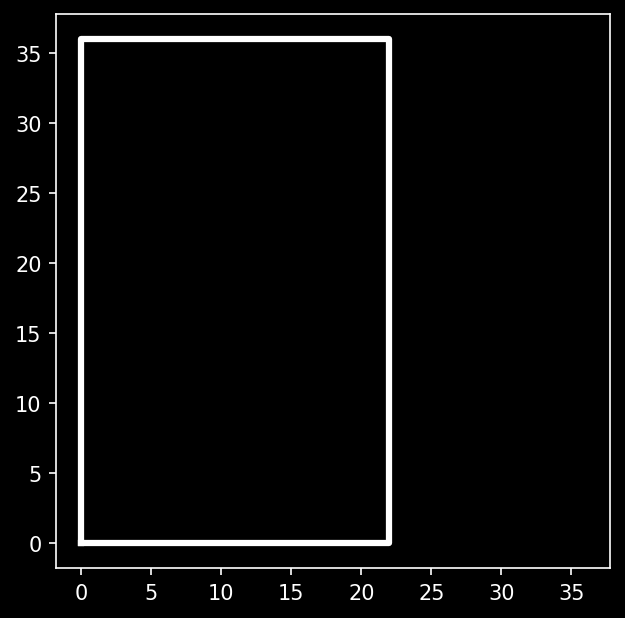

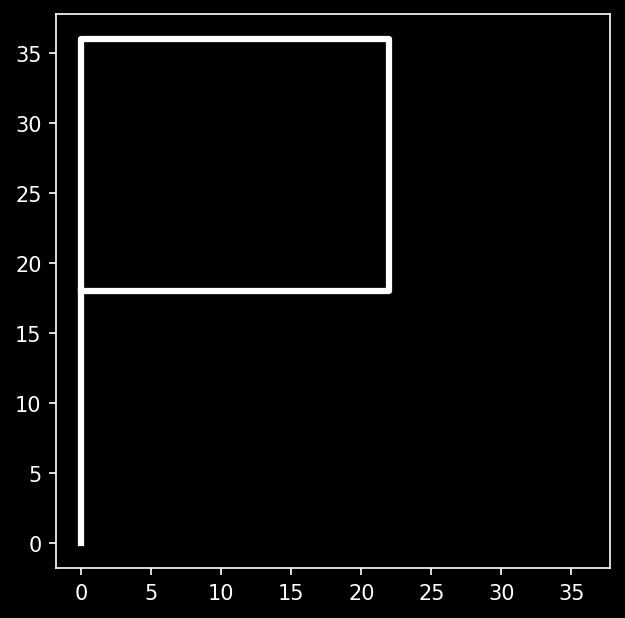

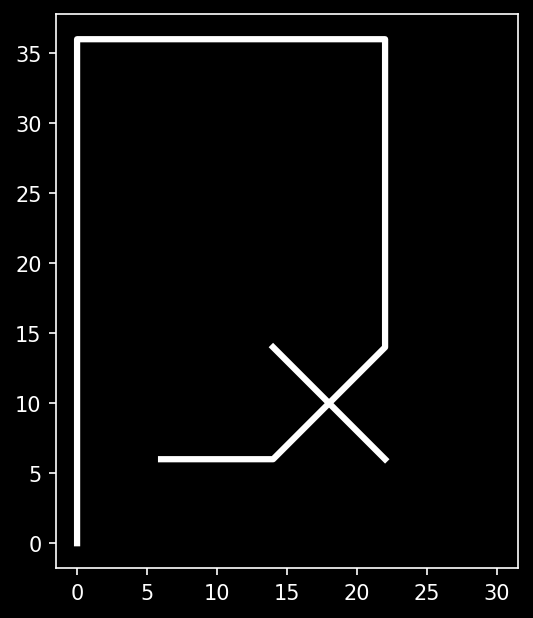

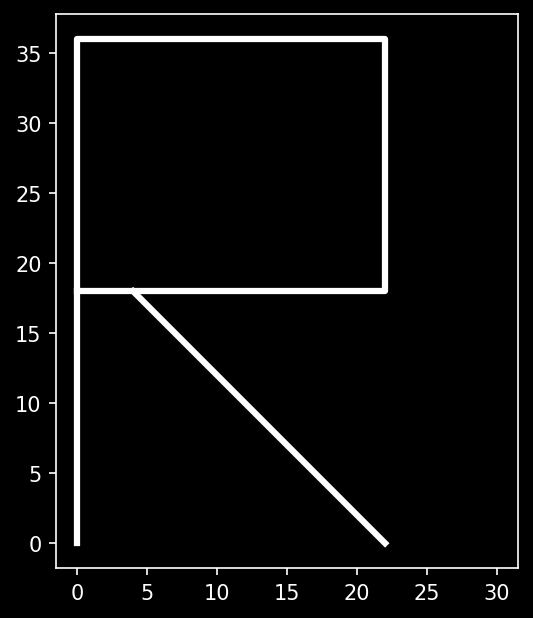

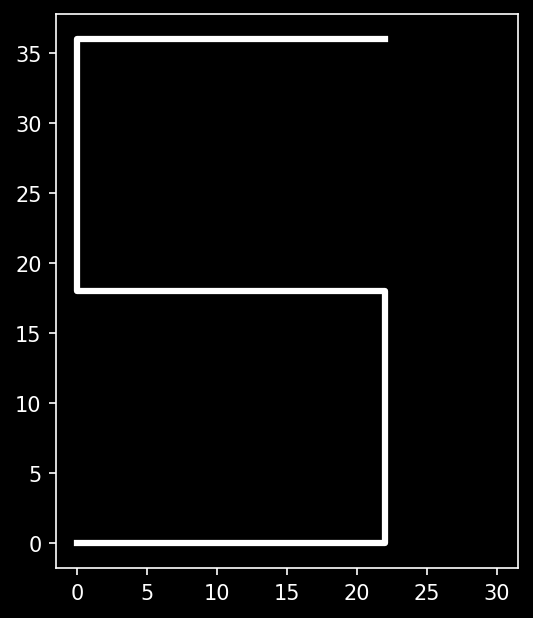

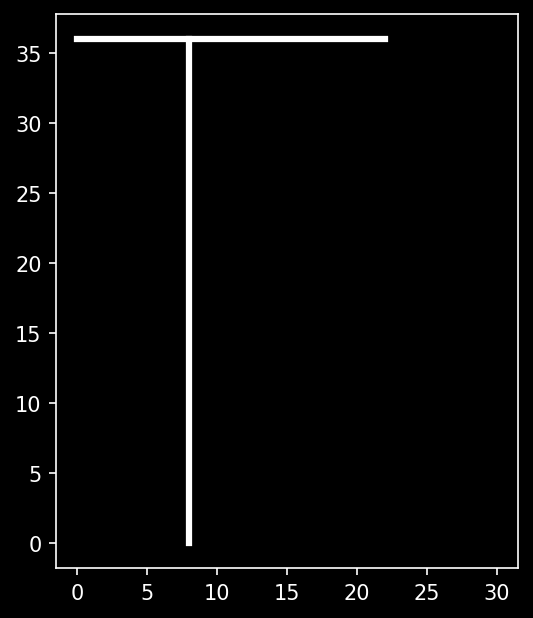

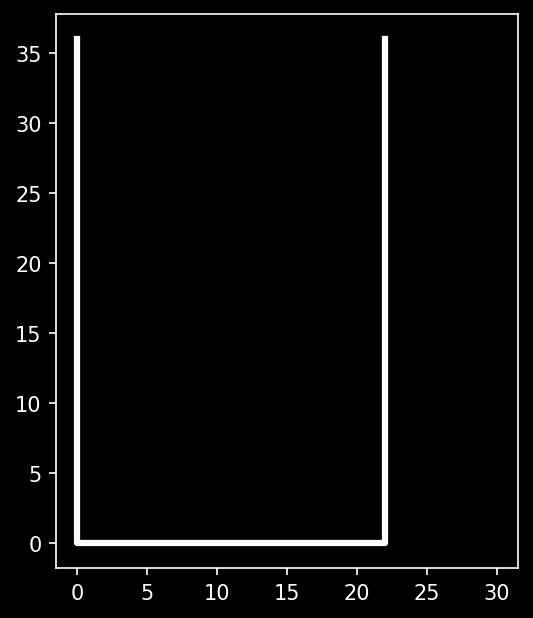

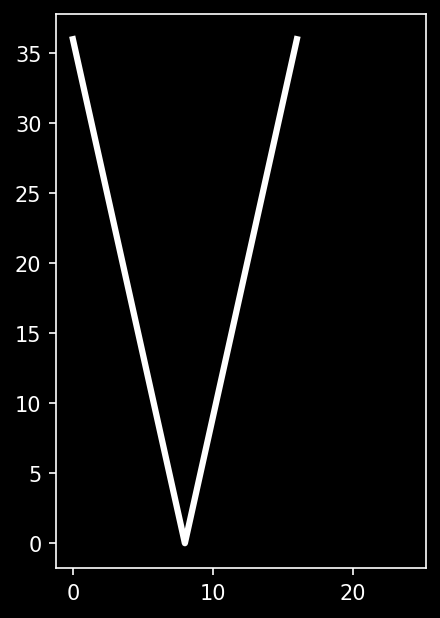

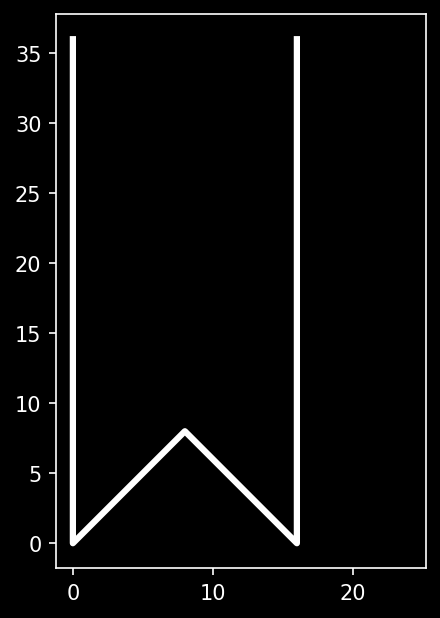

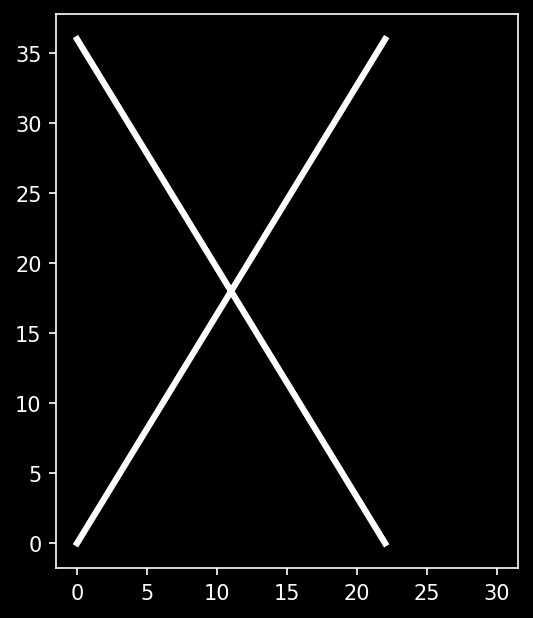

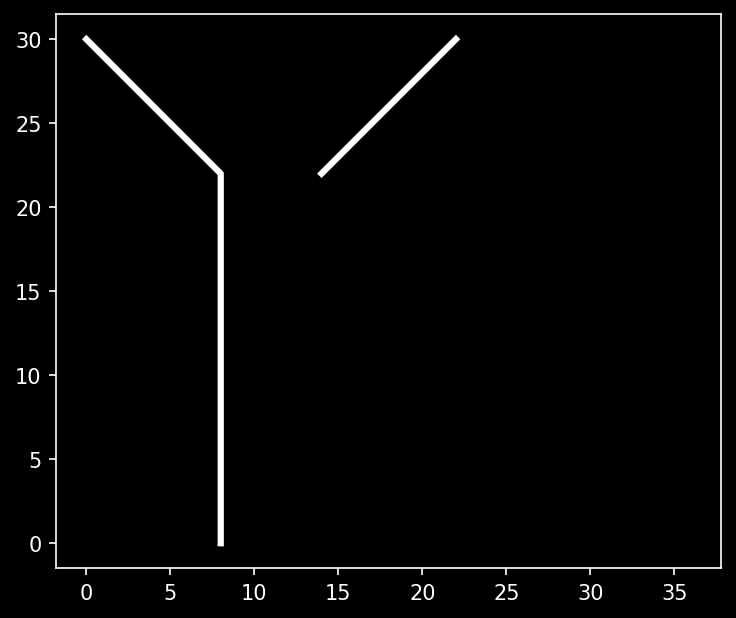

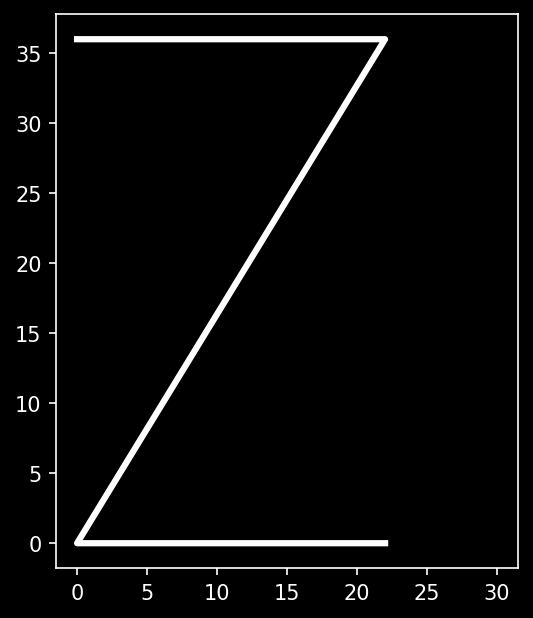

In [7]:
import re
anvgan = open("../tempest_fun/src/ANVGAN.MAC",'r').read()
letters = [tuple(x.split(':')) for x in re.split('CHAR\.',anvgan)[1:27]]
letters = {x:y for x,y in letters}
for c, vec_data in letters.items():
    vector_data = "\tVCTR 0,0,0\n"
    vector_data += vec_data
    vectors = parse_vector_commands(vector_data)
    vertices = vectors_to_coords(vectors)
    plot_vertices(vertices,c,"")


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_252689/2822156483.py:3: SyntaxWarning: invalid escape sequence '\.'
  numbers = [tuple(x.split(':'))[:2] for x in re.split('CHAR\.',anvgan)[30:39]]


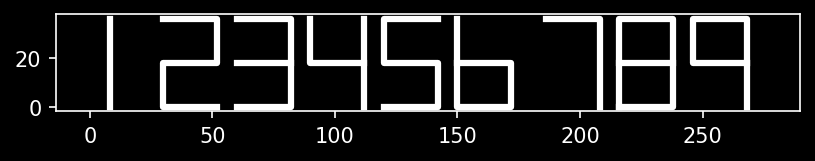

In [8]:
import re
anvgan = open("../tempest_fun/src/ANVGAN.MAC",'r').read()
numbers = [tuple(x.split(':'))[:2] for x in re.split('CHAR\.',anvgan)[30:39]]
numbers = {x:y for x,y in numbers}
vector_data = "\tVCTR 0,0,0\n"
for c, vec_data in numbers.items():
    vector_data += vec_data
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices,"")


In [22]:
letters["A"]

'\tVCTR 0,16,.BRITE\n\tVCTR 8,8,.BRITE\n\tVCTR 8,-8,.BRITE\n\tVCTR 0,-16,.BRITE\n\tVCTR -16,8,0\n\tVCTR 16,0,.BRITE\n\tVCTR 8,-8,0\n\tRTSL\n\t\n'

[(0, 0, 'BLACK'), (0, 22, 'WHITE'), (8, 8, 'WHITE'), (8, -8, 'WHITE'), (0, -22, 'WHITE'), (-22, 8, 'BLACK'), (22, 0, 'WHITE'), (8, -8, 'BLACK')]
[(0, 0, 'BLACK'), (0, 0, 'WHITE'), (0, 22, 'WHITE'), (8, 30, 'WHITE'), (16, 22, 'WHITE'), (16, 0, 'WHITE'), (16, 0, 'BLACK'), (-6, 8, 'BLACK'), (-6, 8, 'WHITE'), (16, 8, 'WHITE'), (16, 8, 'BLACK'), (24, 0, 'BLACK')]


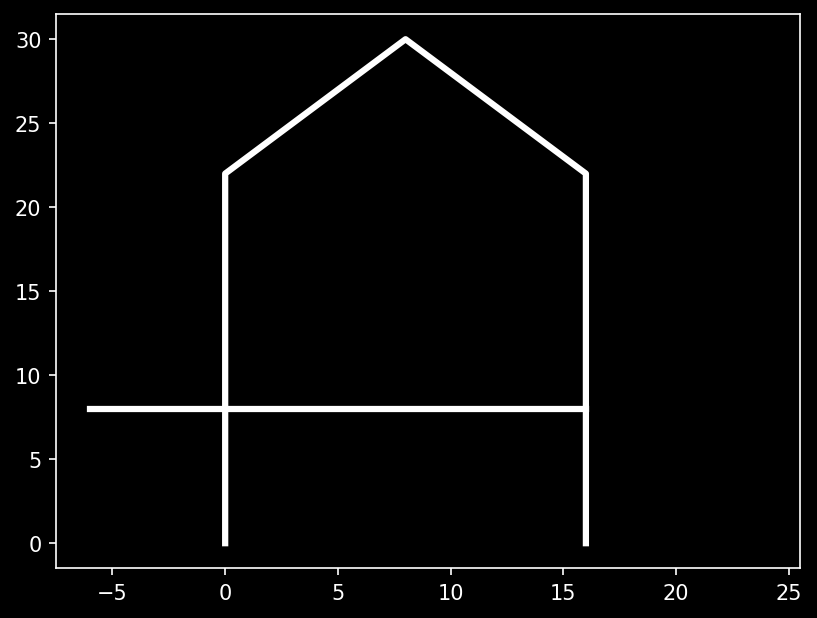

In [21]:
vector_data = "VCTR 0,0,0\n"
word = "A"
for c in word:
    vector_data += letters[c]
vectors = parse_vector_commands(vector_data)
print(vectors)
vertices = vectors_to_coords(vectors)
print(vertices)
plot_vertices(vertices,"")
#plot_vertices_imgonly(vertices,"atari ",points="",linewidth=6.0)